In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.drop("Serial No.",axis=1,inplace=True)

In [5]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
X=data.drop("Chance of Admit ",axis=1)
y= data["Chance of Admit "]

In [8]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [9]:
ridge = Ridge()
lasso = Lasso()

In [10]:
param={'alpha':[1e-15,1e-12,1e-10,1e-8,1e-5,1e-2,1e-1,1,2,5,8,10,15,20,25,30,35,40,45,50,60,70,80,100,150,200]}

In [11]:
grid1=GridSearchCV(ridge,param,scoring="neg_mean_squared_error",cv=5)

In [12]:
grid1.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-12, 1e-10, 1e-08, 1e-05, 0.01, 0.1,
                                   1, 2, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45,
                                   50, 60, 70, 80, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [13]:
grid1.best_params_

{'alpha': 1e-12}

In [14]:
grid1.best_score_

-0.004753619007855825

In [15]:
grid2=GridSearchCV(lasso,param,scoring="neg_mean_squared_error",cv=5)

In [16]:
grid2.fit(X,y)
grid2.best_params_

{'alpha': 1e-05}

In [17]:
grid2.best_score_

-0.004753238913915491

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
pred1=grid1.predict(X_test)
pred2=grid2.predict(X_test)

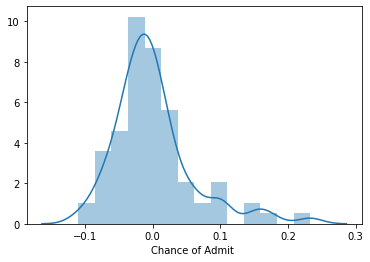

In [21]:
sns.distplot(pred1-y_test)

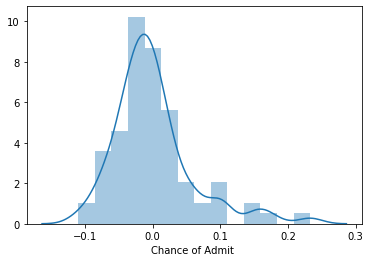

In [22]:
sns.distplot(pred2-y_test)